In [8]:
import pandas as pd

file_path = "SuperStoreUS-2015.xlsx"
data = pd.read_excel(file_path)

print(data.head())

   Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0   20847           High      0.01        2.84           0.93            3   
1   20228  Not Specified      0.02      500.98          26.00            5   
2   21776       Critical      0.06        9.48           7.29           11   
3   24844         Medium      0.09       78.69          19.99           14   
4   24846         Medium      0.08        3.28           2.31           14   

       Customer Name       Ship Mode Customer Segment Product Category  ...  \
0      Bonnie Potter     Express Air        Corporate  Office Supplies  ...   
1     Ronnie Proctor  Delivery Truck      Home Office        Furniture  ...   
2      Marcus Dunlap     Regular Air      Home Office        Furniture  ...   
3  Gwendolyn F Tyson     Regular Air   Small Business        Furniture  ...   
4  Gwendolyn F Tyson     Regular Air   Small Business  Office Supplies  ...   

    Region State or Province         City  Postal Code O

For this hackathon, I plan to create a supply chain optimization platform powered by AI. This platform will focus on demand forecasting, route optimization, and managing suppliers. By leveraging machine learning and real-time data analytics, it aims to help businesses improve their supply chain processes, cut costs, and make better decisions. Ultimately, this project is about enhancing efficiency and promoting sustainability in operations.

In [9]:

data.describe()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1936.000000,1952.000000,1952,1952,1952.000000,1952.000000,1952.000000,1952.000000
mean,19916.479508,0.048975,109.079221,12.968151,1735.376537,0.515186,51534.769467,2015-03-29 01:21:08.852459008,2015-03-30 23:55:34.426229248,114.793859,12.944672,985.828832,82365.924180
min,64.000000,0.000000,1.140000,0.490000,3.000000,0.350000,1001.000000,2015-01-01 00:00:00,2015-01-02 00:00:00,-16476.838000,1.000000,2.250000,359.000000
25%,19121.000000,0.020000,6.480000,3.230000,875.000000,0.380000,28560.000000,2015-02-11 00:00:00,2015-02-13 00:00:00,-84.485400,5.000000,58.807500,86767.750000
50%,21164.500000,0.050000,20.990000,6.150000,1738.000000,0.525000,48765.500000,2015-03-27 12:00:00,2015-03-29 00:00:00,1.476450,10.000000,202.395000,88376.000000
75%,23483.250000,0.080000,100.972500,14.362500,2578.250000,0.590000,78550.000000,2015-05-15 00:00:00,2015-05-16 00:00:00,116.201575,16.000000,802.945000,89957.000000
max,26389.000000,0.210000,6783.020000,164.730000,3403.000000,0.850000,99362.000000,2015-06-30 00:00:00,2015-07-08 00:00:00,9228.225600,167.000000,45737.330000,91586.000000
std,5957.595627,0.031378,393.481301,17.414631,991.078006,0.137055,29362.828420,NaN,NaN,1141.112387,13.871565,2559.900167,19042.295798


In [10]:

total_nulls = data.isnull().sum()

print(total_nulls)



Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64


In [11]:
null_count = data.isnull().sum()

print(total_nulls)

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64


In [12]:

duplicates = data.duplicated()
print(f"Total number of duplicate rows: {duplicates.sum()}")

Total number of duplicate rows: 0


In [13]:
data['Product Base Margin'].fillna(data['Product Base Margin'].mean(), inplace=True)
print(data)

      Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0      20847           High      0.01        2.84           0.93            3   
1      20228  Not Specified      0.02      500.98          26.00            5   
2      21776       Critical      0.06        9.48           7.29           11   
3      24844         Medium      0.09       78.69          19.99           14   
4      24846         Medium      0.08        3.28           2.31           14   
...      ...            ...       ...         ...            ...          ...   
1947   19842           High      0.01       10.90           7.46         3397   
1948   19843           High      0.10        7.99           5.03         3397   
1949   26208  Not Specified      0.08       11.97           5.81         3399   
1950   24911         Medium      0.10        9.38           4.93         3400   
1951   25914           High      0.10      105.98          13.99         3403   

          Customer Name    

C:\Users\ammou\AppData\Local\Temp\ipykernel_25772\3779444177.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Product Base Margin'].fillna(data['Product Base Margin'].mean(), inplace=True)


In [14]:
columns = ['Order Priority', 'Ship Mode', 'Customer Segment', 
                       'Product Category', 'Product Sub-Category', 
                       'Product Container', 'Country', 'Region', 
                       'State or Province', 'City']

for column in columns:
    print(f"Unique values in '{column}':{data[column].unique()}\n")



Unique values in 'Order Priority':['High' 'Not Specified' 'Critical' 'Medium' 'Low' 'Critical ']

Unique values in 'Ship Mode':['Express Air' 'Delivery Truck' 'Regular Air']

Unique values in 'Customer Segment':['Corporate' 'Home Office' 'Small Business' 'Consumer']

Unique values in 'Product Category':['Office Supplies' 'Furniture' 'Technology']

Unique values in 'Product Sub-Category':['Pens & Art Supplies' 'Chairs & Chairmats' 'Office Furnishings'
 'Rubber Bands' 'Envelopes' 'Telephones and Communication'
 'Office Machines' 'Paper' 'Binders and Binder Accessories' 'Labels'
 'Storage & Organization' 'Tables' 'Scissors, Rulers and Trimmers'
 'Computer Peripherals' 'Bookcases' 'Appliances' 'Copiers and Fax']

Unique values in 'Product Container':['Wrap Bag' 'Jumbo Drum' 'Small Pack' 'Small Box' 'Medium Box' 'Jumbo Box'
 'Large Box']

Unique values in 'Country':['United States']

Unique values in 'Region':['West' 'East' 'Central' 'South']

Unique values in 'State or Province':['Washingt

In [15]:
print(data['Order Priority'].unique())

['High' 'Not Specified' 'Critical' 'Medium' 'Low' 'Critical ']


In [16]:
data.columns = data.columns.str.strip()  

data.rename(columns={'Order Date': 'Order_Date'}, inplace=True)

In [17]:
data

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order_Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,19842,High,0.01,10.90,7.46,3397,Andrea Shaw,Regular Air,Small Business,Office Supplies,...,Central,Illinois,Danville,61832,2015-03-11,2015-03-12,-116.7600,18,207.31,87536
1948,19843,High,0.10,7.99,5.03,3397,Andrea Shaw,Regular Air,Small Business,Technology,...,Central,Illinois,Danville,61832,2015-03-11,2015-03-12,-160.9520,22,143.12,87536
1949,26208,Not Specified,0.08,11.97,5.81,3399,Marvin Reid,Regular Air,Small Business,Office Supplies,...,Central,Illinois,Des Plaines,60016,2015-03-29,2015-03-31,-41.8700,5,59.98,87534
1950,24911,Medium,0.10,9.38,4.93,3400,Florence Gold,Express Air,Small Business,Furniture,...,East,West Virginia,Fairmont,26554,2015-04-04,2015-04-04,-24.7104,15,135.78,87537


In [18]:
data['Order Priority'] = data['Order Priority'].str.strip()

priority_mapping = {
    "Critical": 4,
    "High": 3,
    "Medium": 2,
    "Low": 1,
    "Not Specified": 0  
}

data['Order Priority'] = data['Order Priority'].map(priority_mapping)
print(data['Order Priority'].unique())
print(data.head())

[3 0 4 2 1]
   Row ID  Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0   20847               3      0.01        2.84           0.93            3   
1   20228               0      0.02      500.98          26.00            5   
2   21776               4      0.06        9.48           7.29           11   
3   24844               2      0.09       78.69          19.99           14   
4   24846               2      0.08        3.28           2.31           14   

       Customer Name       Ship Mode Customer Segment Product Category  ...  \
0      Bonnie Potter     Express Air        Corporate  Office Supplies  ...   
1     Ronnie Proctor  Delivery Truck      Home Office        Furniture  ...   
2      Marcus Dunlap     Regular Air      Home Office        Furniture  ...   
3  Gwendolyn F Tyson     Regular Air   Small Business        Furniture  ...   
4  Gwendolyn F Tyson     Regular Air   Small Business  Office Supplies  ...   

    Region State or Province         C

NameError: name 'plt' is not defined

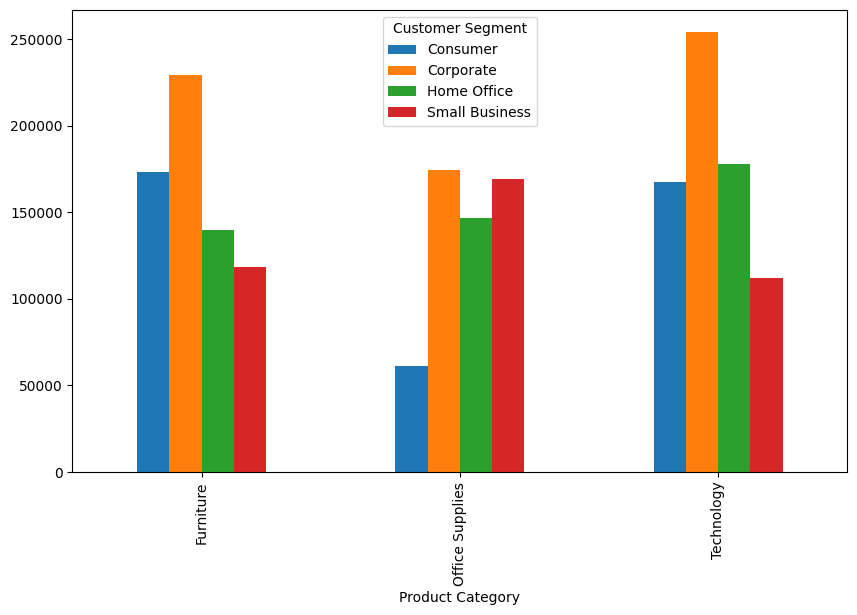

In [19]:

segment_sales = data.groupby(['Customer Segment', 'Product Category'])['Sales'].sum().reset_index()

pivot_segment_sales = segment_sales.pivot(index='Product Category', columns='Customer Segment', values='Sales')

pivot_segment_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Sales by Customer Segment for Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Customer Segment')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


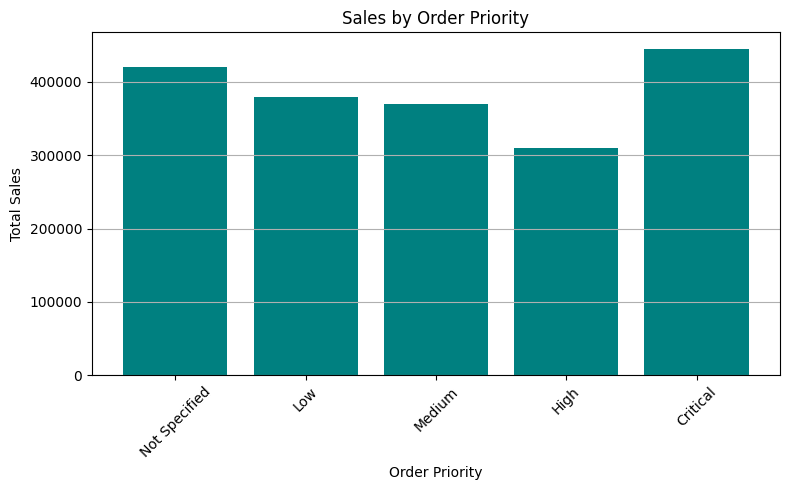

In [77]:
priority_sales = data.groupby('Order Priority')['Sales'].sum().reset_index()

priority_labels = {v: k for k, v in priority_mapping.items()}

priority_sales['Order Priority'] = priority_sales['Order Priority'].map(priority_labels)

plt.figure(figsize=(8, 5))
plt.bar(priority_sales['Order Priority'], priority_sales['Sales'], color='teal')
plt.title('Sales by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [21]:
# Ensure date columns are parsed correctly
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Prepare the data by dropping rows with missing values
data = data.dropna()

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

X = data.drop('Profit', axis=1) 
y = data['Profit']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train['Order Date'] = X_train['Order Date'].astype('int64') // 10**9
X_train['Ship Date'] = X_train['Ship Date'].astype('int64') // 10**9
X_test['Order Date'] = X_test['Order Date'].astype('int64') // 10**9
X_test['Ship Date'] = X_test['Ship Date'].astype('int64') // 10**9

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

xgb.plot_importance(xgb_reg)
plt.show()


KeyError: 'Order Date'

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)


c:\Users\ammou\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.7}


In [48]:
xgb_reg_optimized = xgb.XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=9,
    n_estimators=100,
    subsample=0.7
)

xgb_reg_optimized.fit(X_train, y_train)

y_pred_optimized = xgb_reg_optimized.predict(X_test)

mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized Mean Squared Error: {mse_optimized}")
print(f"Optimized R-Squared: {r2_optimized}")


Optimized Mean Squared Error: 578118.7964221301
Optimized R-Squared: 0.3203521061353588


In [53]:
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

from scipy import stats
import numpy as np

# Calculate z-scores and outliers
z_scores = np.abs(stats.zscore(data[numeric_columns]))
outliers = (z_scores > 3).any(axis=1)

# Show percentage of outliers
print(f"Percentage of outliers: {outliers.mean() * 100:.2f}%")



Percentage of outliers: 9.71%


In [54]:
outlier_indices = np.where(outliers)[0]
outlier_data = data.iloc[outlier_indices]  
print(outlier_data)

      Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
1                  5      0.02      500.98          26.00            5   
13                 2      0.05       26.48           6.93           21   
14                 5      0.08        5.00           3.39           21   
15                 5      0.07       12.99           9.44           21   
22                 3      0.06      205.99           8.99           32   
...              ...       ...         ...            ...          ...   
1868               3      0.04      449.99          24.49         3275   
1869               3      0.01        5.84           1.20         3275   
1886               3      0.05      122.99          70.20         3314   
1912               3      0.10      120.98           9.07         3355   
1946               3      0.00     1270.99          19.99         3397   

      Ship Mode  Customer Segment  Product Category  Product Sub-Category  \
1             0                 2 

Original percentage of outliers: 9.71%
Percentage of outliers removed: 9.71%
Original data shape: (1936, 26)
Cleaned data shape: (1748, 26)

Summary Statistics before removal:
       Order Priority     Discount   Unit Price  Shipping Cost  Customer ID  \
count     1936.000000  1936.000000  1936.000000    1936.000000  1936.000000   
mean         2.802169     0.048858   108.034685      12.783280  1733.831095   
std          1.718606     0.031340   394.836173      17.289631   990.512340   
min          0.000000     0.000000     1.140000       0.490000     3.000000   
25%          2.000000     0.020000     6.480000       3.032500   874.000000   
50%          3.000000     0.050000    20.990000       6.095000  1738.000000   
75%          4.000000     0.070000    99.230000      14.000000  2578.000000   
max          5.000000     0.210000  6783.020000     164.730000  3403.000000   

         Ship Mode  Customer Segment  Product Category  Product Sub-Category  \
count  1936.000000       1936.00

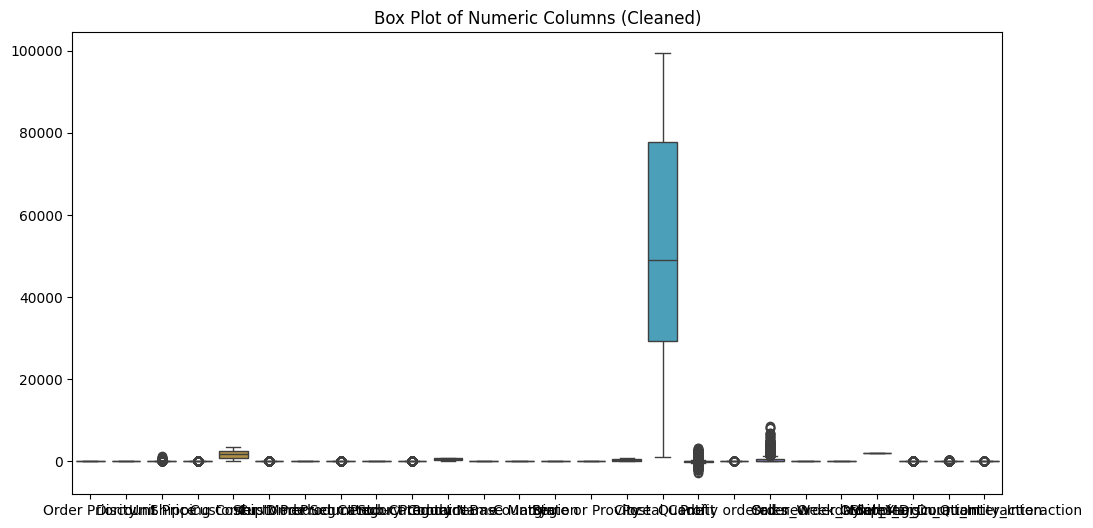

In [59]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

z_scores = np.abs(stats.zscore(data[numeric_columns]))
outliers = (z_scores > 3).any(axis=1)

original_outlier_percentage = (outliers.sum() / data.shape[0]) * 100
print(f"Original percentage of outliers: {original_outlier_percentage:.2f}%")

data_cleaned = data[~outliers]

new_outlier_percentage = (outliers.sum() / data.shape[0]) * 100
print(f"Percentage of outliers removed: {new_outlier_percentage:.2f}%")

print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape: {data_cleaned.shape}")

print("\nSummary Statistics before removal:")
print(data.describe())

print("\nSummary Statistics after removal:")
print(data_cleaned.describe())

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_cleaned[numeric_columns])
plt.title('Box Plot of Numeric Columns (Cleaned)')
plt.show()


In [22]:
import pandas as pd

original_df = pd.read_excel('CleanedData.xlsx')

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return data[(data[column] >= Q1 - 1.5 * IQR) & (data[column] <= Q3 + 1.5 * IQR)]

cleaned_df = original_df.copy()

for column in ['Unit Price', 'Shipping Cost', 'Profit']:
    cleaned_df = remove_outliers_iqr(cleaned_df, column)

outliers_df = original_df[~original_df.index.isin(cleaned_df.index)]

print(f"Cleaned data shape: {cleaned_df.shape}")
print(cleaned_df.describe())

print(f"Outliers shape: {outliers_df.shape}")
print(outliers_df.describe())

outliers_df.to_excel('Outliers.xlsx', index=False)


Cleaned data shape: (1227, 25)
             Row ID     Discount   Unit Price  Shipping Cost  Customer ID  \
count   1227.000000  1227.000000  1227.000000    1227.000000  1227.000000   
mean   19997.339038     0.048329    21.451051       5.184825  1706.423798   
min       87.000000     0.000000     1.140000       0.490000     3.000000   
25%    19119.500000     0.020000     5.180000       1.990000   831.500000   
50%    21184.000000     0.050000     9.110000       5.010000  1699.000000   
75%    23562.500000     0.070000    22.720000       6.970000  2566.500000   
max    26389.000000     0.210000   225.040000      19.510000  3400.000000   
std     5922.703765     0.031629    32.108226       3.669702   997.520319   

       Product Base Margin   Postal Code                     Order Date  \
count          1226.000000   1227.000000                           1227   
mean              0.484584  52843.538712  2015-03-30 03:13:38.581907200   
min               0.350000   1001.000000          

In [23]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

cleaned_df = pd.read_excel('CleanedData.xlsx')

X = cleaned_df[['Unit Price', 'Shipping Cost']] 
y = cleaned_df['Profit']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_reg_optimized = xgb.XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=9,
    n_estimators=100,
    subsample=0.7
)

xgb_reg_optimized.fit(X_train, y_train)

y_pred_optimized = xgb_reg_optimized.predict(X_test)

mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized Mean Squared Error: {mse_optimized}")
print(f"Optimized R-Squared: {r2_optimized}")


Optimized Mean Squared Error: 975263.3381558172
Optimized R-Squared: 0.22022134314866282


In [24]:
import pandas as pd

outliers_df = pd.read_excel('Outliers.xlsx')
cleaned_data_df = pd.read_excel('CleanedData.xlsx')

print("Outliers Dataset:")
print(outliers_df.head())

print("\nCleaned Data Dataset:")
print(cleaned_data_df.head())

def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return data[(data[column] < Q1 - 1.5 * IQR) | (data[column] > Q3 + 1.5 * IQR)]

outliers_in_cleaned_data = pd.DataFrame()
for column in ['Unit Price', 'Shipping Cost', 'Profit']:
    outliers_in_cleaned_data = pd.concat([outliers_in_cleaned_data, find_outliers_iqr(cleaned_data_df, column)])

unique_outliers_in_cleaned_data = outliers_in_cleaned_data.drop_duplicates()

cleaned_data_without_outliers = cleaned_data_df[~cleaned_data_df.isin(unique_outliers_in_cleaned_data)].dropna()

print("\nCleaned Data After Removing Remaining Outliers:")
print(cleaned_data_without_outliers.describe())

cleaned_data_without_outliers.to_excel('CleanedData_Final.xlsx', index=False)


Outliers Dataset:
   Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0   20228  Not Specified      0.02      500.98          26.00            5   
1   24844         Medium      0.09       78.69          19.99           14   
2   26268           High      0.05      115.99           2.50           16   
3   23890           High      0.05       26.48           6.93           18   
4    5890           High      0.05       26.48           6.93           21   

          Customer Name       Ship Mode Customer Segment Product Category  \
0        Ronnie Proctor  Delivery Truck      Home Office        Furniture   
1     Gwendolyn F Tyson     Regular Air   Small Business        Furniture   
2          Sarah Ramsey     Regular Air   Small Business       Technology   
3          Laurie Hanna     Regular Air   Small Business        Furniture   
4  Tony Wilkins Winters     Regular Air   Small Business        Furniture   

   ...   Region State or Province           City  

In [25]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

final = pd.read_excel('CleanedData_Final.xlsx')

X = final[['Unit Price', 'Shipping Cost']]
y = final['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_reg_optimized = xgb.XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=9,
    n_estimators=100,
    subsample=0.7
)

xgb_reg_optimized.fit(X_train, y_train)

y_pred_optimized = xgb_reg_optimized.predict(X_test)

mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized Mean Squared Error: {mse_optimized:.4f}")
print(f"Optimized R-Squared: {r2_optimized:.4f}")


Optimized Mean Squared Error: 21301.1601
Optimized R-Squared: -0.0220


00:43:36 - cmdstanpy - INFO - Chain [1] start processing
00:43:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 275292.9402656345
R-Squared: 0.021208416981039813


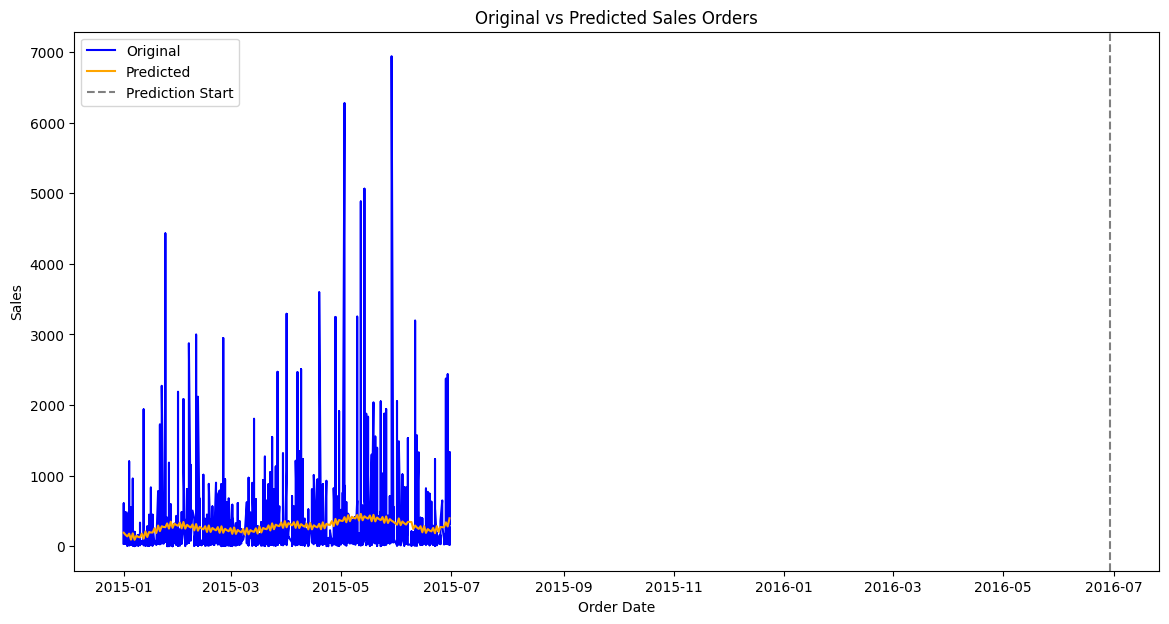

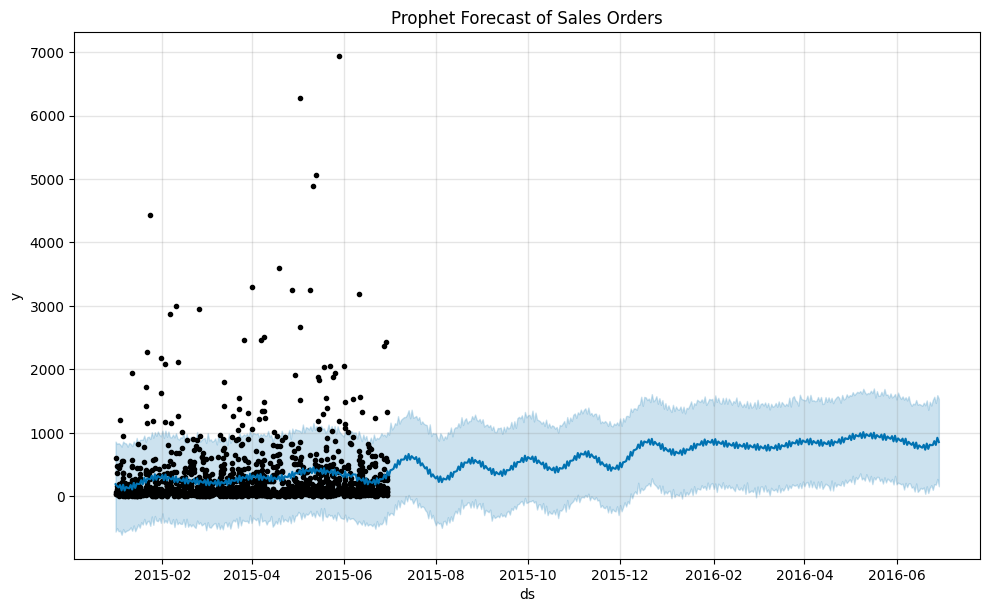

In [46]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

cleaned_df = pd.read_excel('CleanedData_Final.xlsx')

cleaned_df['Order Date'] = pd.to_datetime(cleaned_df['Order Date'])

prophet_df = cleaned_df[['Order Date', 'Sales']].copy()
prophet_df.columns = ['ds', 'y']

holidays = pd.DataFrame({
    'holiday': 'event_name',
    'ds': pd.to_datetime(['2023-12-25', '2023-11-11']),
    'lower_window': 0,
    'upper_window': 1,
})

prophet_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    # holidays=holidays  # Uncomment if adding holidays
)

prophet_model.fit(prophet_df)

future = prophet_model.make_future_dataframe(periods=365)
forecast = prophet_model.predict(future)

merged_df = pd.merge(
    cleaned_df[['Order Date', 'Sales']], 
    forecast[['ds', 'yhat']], 
    left_on='Order Date', 
    right_on='ds',
    how='outer'
)

y_true = merged_df['Sales'].values
y_pred = merged_df['yhat'].values

valid_indices = ~pd.isna(y_true) & ~pd.isna(y_pred)
mse = mean_squared_error(y_true[valid_indices], y_pred[valid_indices])  # Ensure valid comparison
r2 = r2_score(y_true[valid_indices], y_pred[valid_indices])

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

# Plotting original data and predictions
plt.figure(figsize=(14, 7))
plt.plot(merged_df['Order Date'], merged_df['Sales'], label='Original', color='blue')
plt.plot(merged_df['Order Date'], merged_df['yhat'], label='Predicted', color='orange')
plt.axvline(x=merged_df['ds'].max(), linestyle='--', color='gray', label='Prediction Start')
plt.title('Original vs Predicted Sales Orders')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Plot forecast using Prophet
fig = prophet_model.plot(forecast)
plt.title('Prophet Forecast of Sales Orders')
plt.show()


In [28]:
cleaned_df = pd.read_excel('SuperStoreUS-2015.xlsx')
print(cleaned_df.columns)

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Country', 'Region',
       'State or Province', 'City', 'Postal Code', 'Order Date', 'Ship Date',
       'Profit', 'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')
